In [1]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import MolsToGridImage

In [2]:
from polymerize2 import get_polymer_list

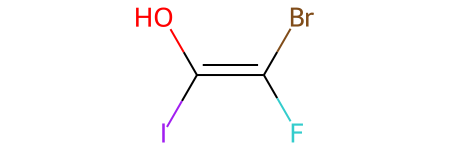

In [3]:
vinyl_smiles = "C(O)(I)=C(F)([Br])"
dp0 = Chem.MolFromSmiles(vinyl_smiles)
dp0

In [4]:
mols, smiles = get_polymer_list(5, "C(O)=C(F)([Br])", "vinyl/acrylic")

[10:59:52] reactant 1 has no mapped atoms.
[10:59:52] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


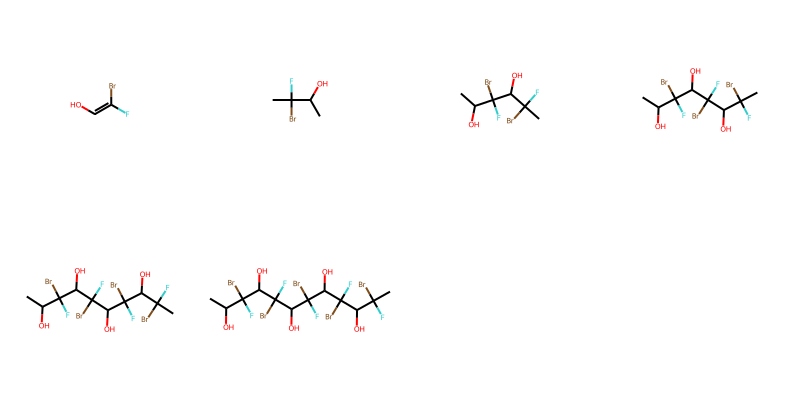

In [5]:
MolsToGridImage(mols, molsPerRow=4)

In [6]:
smiles

['OC=C(F)Br',
 'CC(O)C(C)(F)Br',
 'CC(O)C(F)(Br)C(O)C(C)(F)Br',
 'CC(O)C(F)(Br)C(O)C(F)(Br)C(O)C(C)(F)Br',
 'CC(O)C(F)(Br)C(O)C(F)(Br)C(O)C(F)(Br)C(O)C(C)(F)Br',
 'CC(O)C(F)(Br)C(O)C(F)(Br)C(O)C(F)(Br)C(O)C(F)(Br)C(O)C(C)(F)Br']